# Importing Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
# !pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Dataset as ds
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


# Exploring Dataset


In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

In [5]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


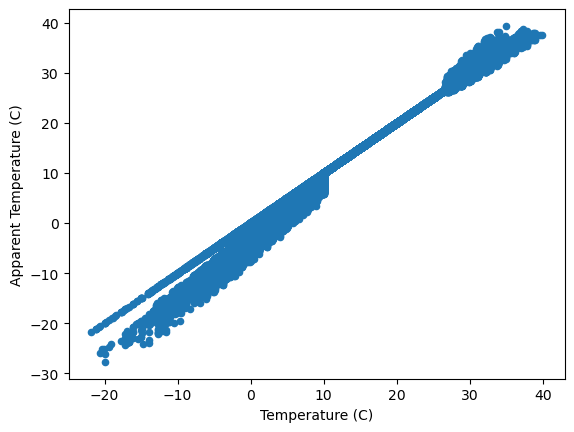

In [9]:
# shows high collinearity btw Temperature & Apparent Temperature (same we can see in histogram below)
df.plot(kind="scatter",x='Temperature (C)',y='Apparent Temperature (C)')
plt.show()

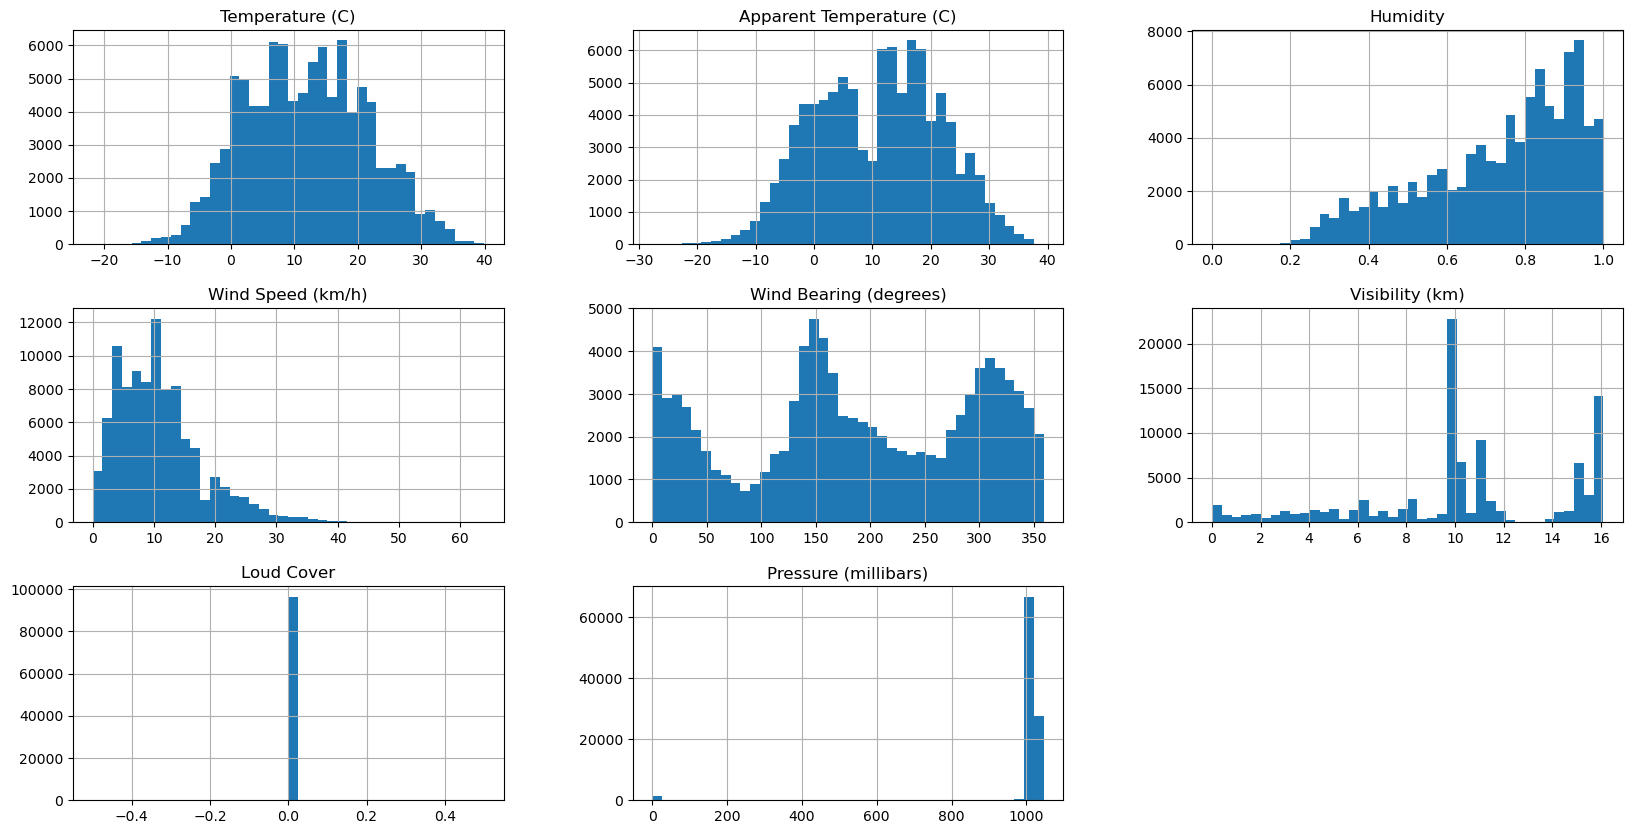

In [10]:
df.hist(bins=40,figsize=(20,10))
plt.show()

# Feature Selection

In [11]:
# Droping Column 'Loud Cover' because it contains only ZEROES (refer ds.describe table)
df.drop('Loud Cover', inplace=True , axis=1)

In [12]:
# Droping Column 'Formatted Date'
df.drop('Formatted Date', inplace=True , axis=1)
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [13]:
# Dropping Column 'Apparent Temperature' b/c of high collinearity btw Temperature & Apparent Temperature
df.drop('Apparent Temperature (C)', inplace=True , axis = 1)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [14]:
# Droping Column 'Daily Summary'
df.drop('Daily Summary', inplace=True , axis=1)
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51


# Preprocessing 

In [15]:
# Droping null records exist in 'Percip Type'
df.dropna(axis=0, subset=['Precip Type'], inplace=True)
df.isnull().sum()

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Pressure (millibars)      0
dtype: int64

In [16]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
95859,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95860,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95861,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95862,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [17]:
df['Summary'].describe()

count             95864
unique               27
top       Partly Cloudy
freq              31628
Name: Summary, dtype: object

In [18]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [19]:
df['Summary'].value_counts()

Partly Cloudy                          31628
Mostly Cloudy                          27905
Overcast                               16504
Clear                                  10745
Foggy                                   7092
Breezy and Overcast                      527
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

# # Logical or Balanced Dataset Distribution
In this dataset, we can have Logical Distribution (leads to imbalanced) or Balanced Distribution (leads to illogical).
There is a Tradeoff.
So, we are finding a point (by sacrificing records) where we get an optimal Dataset Distribution

Getting Low accuracy when balancing Dataset !!!!

In [20]:
# p_Cloudy = df[df['Summary'] == 'Partly Cloudy'].head(8000)
# p_Cloudy

In [21]:
# m_Cloudy = df[df['Summary'] == 'Mostly Cloudy'].head(8000)
# overcast = df[df['Summary'] == 'Overcast'].head(16000)
# clear = df[df['Summary'] == 'Clear']
# f_and_others = df[~df['Summary'].isin(['Mostly Cloudy', 'Partly Cloudy', 'Overcast','Clear'])]

In [22]:
# f_and_others

In [23]:
# df=pd.concat([m_Cloudy,p_Cloudy,overcast,clear,f_and_others])
# df

In [24]:
# df.reset_index(drop=True, inplace=True)
# df

In [25]:
# df['Summary'] = df['Summary'].replace('Partly Cloudy', 'Cloudy')
# df['Summary'] = df['Summary'].replace('Mostly Cloudy','Cloudy')
# df.loc[~df['Summary'].isin(['Cloudy', 'Overcast', 'Clear']), 'Summary'] = 'Others'

In [26]:
mappings = {
    'Partly Cloudy': 'Cloudy',
    'Mostly Cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Clear': 'Clear',
    'Foggy': 'Foggy',
    'Breezy and Overcast': 'Breezy',
    'Breezy and Mostly Cloudy': 'Breezy',
    'Breezy and Partly Cloudy': 'Breezy',
    'Dry and Partly Cloudy': 'Dry',
    'Windy and Partly Cloudy': 'Windy',
    'Light Rain': 'Rain',
    'Breezy': 'Breezy',
    'Windy and Overcast': 'Windy',
    'Humid and Mostly Cloudy': 'Humid',
    'Drizzle': 'Rain',
    'Breezy and Foggy': 'Breezy',
    'Windy and Mostly Cloudy': 'Windy',
    'Dry': 'Dry',
    'Humid and Partly Cloudy': 'Humid',
    'Dry and Mostly Cloudy': 'Dry',
    'Rain': 'Rain',
    'Windy': 'Windy',
    'Humid and Overcast': 'Humid',
    'Windy and Foggy': 'Windy',
    'Windy and Dry': 'Windy',
    'Dangerously Windy and Partly Cloudy': 'Windy',
    'Breezy and Dry': 'Breezy'
}
df['Summary'] = df['Summary'].map(mappings)
df['Summary'].value_counts()

Cloudy    76037
Clear     10745
Foggy      7092
Breezy     1519
Windy       161
Dry         134
Rain        112
Humid        64
Name: Summary, dtype: int64

[Text(0, 0, 'Cloudy'),
 Text(1, 0, 'Foggy'),
 Text(2, 0, 'Breezy'),
 Text(3, 0, 'Clear'),
 Text(4, 0, 'Humid'),
 Text(5, 0, 'Windy'),
 Text(6, 0, 'Dry'),
 Text(7, 0, 'Rain')]

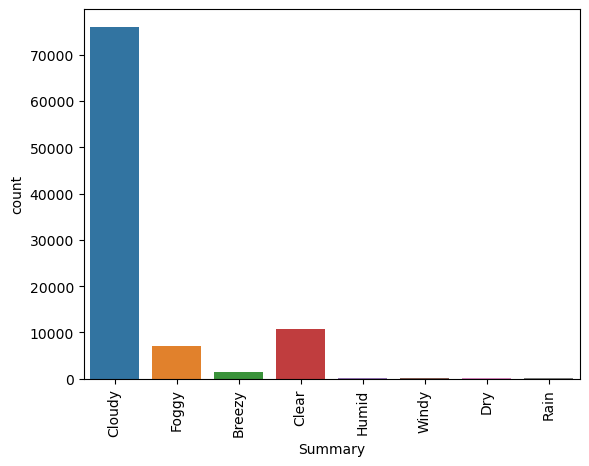

In [27]:
plot = sns.countplot(data=df,x='Summary')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [28]:
label_encoder = LabelEncoder()
df["Summary"] = label_encoder.fit_transform(df["Summary"])
df["Precip Type"] = label_encoder.fit_transform(df["Precip Type"])

In [29]:
df['Summary'].value_counts()

2    76037
1    10745
4     7092
0     1519
7      161
3      134
6      112
5       64
Name: Summary, dtype: int64

In [30]:
df['Precip Type'].value_counts()

0    85190
1    10674
Name: Precip Type, dtype: int64

In [31]:
df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,2,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,2,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,2,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,2,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
95859,2,0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95860,2,0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95861,2,0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95862,2,0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [32]:
X, Y = df.iloc[:,1:], df[['Summary']]
X

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,0,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,0,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,0,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...
95859,0,26.016667,0.43,10.9963,31.0,16.1000,1014.36
95860,0,24.583333,0.48,10.0947,20.0,15.5526,1015.16
95861,0,22.038889,0.56,8.9838,30.0,16.1000,1015.66
95862,0,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [33]:
Y

,Summary
0,2
1,2
2,2
3,2
4,2
...,...
95859,2
95860,2
95861,2
95862,2


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, Y, test_size=0.3,random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state=2)

# Training Models

# # Logistic Regression

In [36]:
model_accuracies = []

In [37]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'class_weight':['balanced',None]}]



best_log = GridSearchCV(estimator = LogisticRegression(random_state=0),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2)


best_log.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV] END ...................................solver=newton-cg; total time=   8.9s
[CV] END ...................................solver=newton-cg; total time=   9.9s
[CV] END ...................................solver=newton-cg; total time=   8.7s
[CV] END ...................................solver=newton-cg; total time=  11.3s
[CV] END ...................................solver=newton-cg; total time=   9.7s
[CV] END .......................................solver=lbfgs; total time=   1.4s
[CV] END .......................................solver=lbfgs; total time=   1.6s
[CV] END .......................................solver=lbfgs; total time=   1.5s
[CV] END .......................................solver=lbfgs; total time=   1.5s
[CV] END .......................................solver=lbfgs; total time=   1.5s
[CV] END ...................................solver=liblinear; total time=   0.7s
[CV] END ...................................solv

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                         {'class_weight': ['balanced', None]}],
             scoring='accuracy', verbose=2)

In [38]:
best_log.best_estimator_

LogisticRegression(random_state=0, solver='newton-cg')

In [39]:
y_pred = best_log.predict(X_test)
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
model_accuracies.append(['LogReg 1',acc])
print(report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       237
           1       0.52      0.04      0.08      1635
           2       0.87      0.99      0.93     11308
           3       0.00      0.00      0.00        21
           4       0.96      0.95      0.95      1117
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       1.00      0.82      0.90        34

    accuracy                           0.87     14380
   macro avg       0.53      0.46      0.47     14380
weighted avg       0.83      0.87      0.83     14380



In [41]:
linearReg2 = LogisticRegression(C=0.01,max_iter=1000)
linearReg2.fit(X_train, y_train)
y_pred = linearReg2.predict(X_test)
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
model_accuracies.append(('LogReg 2',acc))
print(report)

              precision    recall  f1-score   support

           0       0.81      0.63      0.71       237
           1       0.51      0.04      0.08      1635
           2       0.86      0.99      0.92     11308
           3       0.00      0.00      0.00        21
           4       0.96      0.92      0.94      1117
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        34

    accuracy                           0.87     14380
   macro avg       0.39      0.32      0.33     14380
weighted avg       0.83      0.87      0.82     14380



In [42]:
linearReg3 = LogisticRegression(C=1,max_iter=1000)
linearReg3.fit(X_train, y_train)
y_pred = linearReg3.predict(X_test)
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
model_accuracies.append(('LogReg 3',acc))
print(report)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       237
           1       0.52      0.04      0.08      1635
           2       0.87      0.99      0.93     11308
           3       0.00      0.00      0.00        21
           4       0.96      0.95      0.95      1117
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       1.00      0.82      0.90        34

    accuracy                           0.87     14380
   macro avg       0.53      0.46      0.47     14380
weighted avg       0.83      0.87      0.83     14380



In [43]:
linearReg4 = LogisticRegression(C=0.001,max_iter=1000 ,solver='newton-cg', penalty='l2')
linearReg4.fit(X_train, y_train)
y_pred = linearReg4.predict(X_test)
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
model_accuracies.append(('LogReg 4',acc))
print(report)

              precision    recall  f1-score   support

           0       0.48      0.14      0.21       237
           1       0.51      0.04      0.08      1635
           2       0.85      0.99      0.91     11308
           3       0.00      0.00      0.00        21
           4       0.95      0.81      0.87      1117
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        34

    accuracy                           0.85     14380
   macro avg       0.35      0.25      0.26     14380
weighted avg       0.81      0.85      0.80     14380



(0.83, 0.88)

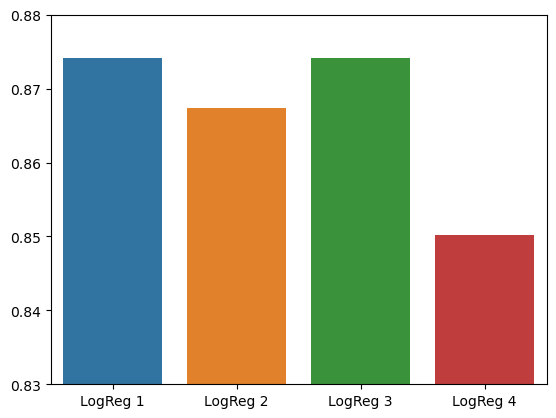

In [44]:
plot = sns.barplot(x=[i[0] for i in model_accuracies],y=[i[1] for i in model_accuracies])
plot.set_ylim(0.830,0.88)

In [45]:
model_accuracies

[['LogReg 1', 0.8742002781641168],
 ('LogReg 2', 0.8673157162726008),
 ('LogReg 3', 0.8741307371349096),
 ('LogReg 4', 0.8502086230876217)]

# KNN Classifier

In [47]:
model_accuracies2 = []

In [48]:
params = {
    'n_neighbors':[3,5,7,9,11,13],
    'weights':['uniform', 'distance'],
    'p':[1,2],
}

best_log = GridSearchCV(estimator = KNeighborsClassifier(),  
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2)


best_log.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   1.6s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   2.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   2.3s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   2.1s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   1.3s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=   0.8s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=3, p=2, we

[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   1.6s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   1.5s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   1.5s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=   1.6s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   1.2s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   1.3s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   1.7s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   2.0s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   1.8s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   1.6s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   1.4s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   1.4s
[CV] END ...............n_ne

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [49]:
y_pred = best_log.predict(X_test)
acc = accuracy_score(y_test, y_pred)
model_accuracies2.append(['KNN 1',acc])
print(report)

              precision    recall  f1-score   support

           0       0.48      0.14      0.21       237
           1       0.51      0.04      0.08      1635
           2       0.85      0.99      0.91     11308
           3       0.00      0.00      0.00        21
           4       0.95      0.81      0.87      1117
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        34

    accuracy                           0.85     14380
   macro avg       0.35      0.25      0.26     14380
weighted avg       0.81      0.85      0.80     14380



In [50]:
knn_classifier1=KNeighborsClassifier(n_neighbors=13)
knn_classifier1.fit(X_train,y_train)
y_pred=knn_classifier1.predict(X_test)
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
model_accuracies2.append(['KNN 2',acc])
print(report)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       237
           1       0.49      0.11      0.17      1635
           2       0.87      0.98      0.92     11308
           3       1.00      0.05      0.09        21
           4       0.96      0.94      0.95      1117
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       1.00      0.56      0.72        34

    accuracy                           0.87     14380
   macro avg       0.65      0.43      0.46     14380
weighted avg       0.84      0.87      0.84     14380



In [52]:
knn_classifier2=KNeighborsClassifier(n_neighbors=5)
knn_classifier2.fit(X_train,y_train)
y_pred=knn_classifier2.predict(X_test)
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
model_accuracies2.append(['KNN 3',acc])
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       237
           1       0.41      0.18      0.25      1635
           2       0.88      0.96      0.92     11308
           3       0.67      0.19      0.30        21
           4       0.95      0.93      0.94      1117
           5       0.00      0.00      0.00        12
           6       0.67      0.12      0.21        16
           7       0.96      0.74      0.83        34

    accuracy                           0.86     14380
   macro avg       0.68      0.50      0.54     14380
weighted avg       0.83      0.86      0.84     14380



In [54]:
knn_classifier3=KNeighborsClassifier(n_neighbors=15)
knn_classifier3.fit(X_train,y_train)
y_pred=knn_classifier3.predict(X_test)
report = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
model_accuracies2.append(['KNN Model 4',acc])
print(report)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       237
           1       0.50      0.09      0.16      1635
           2       0.87      0.98      0.92     11308
           3       0.00      0.00      0.00        21
           4       0.96      0.94      0.95      1117
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00        16
           7       0.95      0.59      0.73        34

    accuracy                           0.87     14380
   macro avg       0.52      0.42      0.45     14380
weighted avg       0.83      0.87      0.83     14380



In [56]:
y_pred=knn_classifier3.predict(X_train)
report = classification_report(y_train, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1054
           1       0.68      0.13      0.22      7547
           2       0.88      0.99      0.93     53246
           3       1.00      0.04      0.08        98
           4       0.96      0.95      0.96      4934
           5       0.00      0.00      0.00        44
           6       0.83      0.07      0.12        76
           7       0.98      0.58      0.73       105

    accuracy                           0.88     67104
   macro avg       0.78      0.45      0.49     67104
weighted avg       0.87      0.88      0.85     67104



(0.85, 0.88)

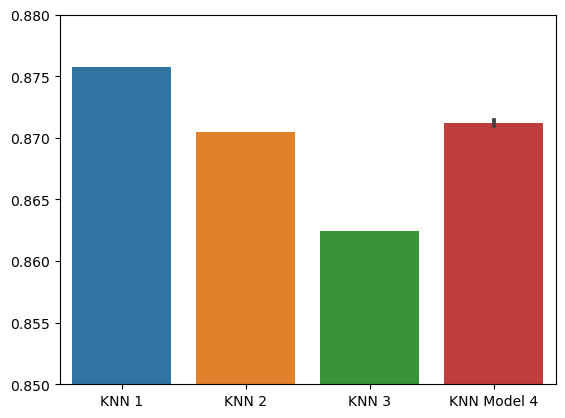

In [59]:
plot = sns.barplot(x=[i[0] for i in model_accuracies2],y=[i[1] for i in model_accuracies2])
plot.set_ylim(0.85,0.88)